In [1]:
import os
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
directory=r"C:/Users/PythonTeam/Desktop/BALAJI/BALAJI/DL Projects/Federated_Deep_Learning_for_Monkeypox_Disease_Detection_on_GAN-Augmented_Dataset/static/uploads/Monkeypox Skin Image Dataset"
train_dir=os.path.join(directory,'Train')
validation_dir=os.path.join(directory,'Validation')

In [4]:
Image_height,Image_width=224,224
Batch_size=32
Epochs=30

In [5]:
train_datagenerator=ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [6]:
train_generator=train_datagenerator.flow_from_directory(
    directory,
    target_size=(Image_height,Image_width),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='training')

Found 618 images belonging to 4 classes.


In [7]:
validation_generator=train_datagenerator.flow_from_directory(
    directory,
    target_size=(Image_height,Image_width),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='validation')

Found 152 images belonging to 4 classes.


In [8]:
def create_model(model):
    model.trainable=True
    x=model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x)
    x=Dropout(0.5)(x)
    output_layer=Dense(4,activation='softmax')(x)
    models=Model(inputs=model.input,outputs=output_layer)
    return models

In [9]:
mode={
    'Xception':Xception(weights='imagenet',include_top=False,input_shape=(Image_height,Image_width,3))}

In [10]:
results={}
for name,base_model in mode.items():
    print(f"Training {name}...")
    model=create_model(base_model)
    model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    Max=model.fit(
        train_generator,
        epochs=Epochs,
        validation_data=validation_generator,
        verbose=1,
        callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=1e-6)])
    loss, accuracy = model.evaluate(validation_generator)
    print(f"{name} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")
    results[name] = accuracy

Training Xception...


c:\Users\PythonTeam\anaconda3\envs\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.5119 - loss: 1.1810 - val_accuracy: 0.5921 - val_loss: 0.9886 - learning_rate: 1.0000e-04
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 212s 11s/step - accuracy: 0.7723 - loss: 0.6069 - val_accuracy: 0.7039 - val_loss: 0.8812 - learning_rate: 1.0000e-04
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 211s 10s/step - accuracy: 0.8718 - loss: 0.4130 - val_accuracy: 0.7961 - val_loss: 0.6408 - learning_rate: 1.0000e-04
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 235s 12s/step - accuracy: 0.9381 - loss: 0.2155 - val_accuracy: 0.8224 - val_loss: 0.5328 - learning_rate: 1.0000e-04
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 209s 10s/step - accuracy: 0.9673 - loss: 0.1241 - val_accuracy: 0.8487 - val_loss: 0.5055 - learning_rate: 1.0000e-04
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 264s 13s/step - accuracy: 0.9807 - loss: 0.0781 - val_accuracy: 0.8750 - val_loss: 0.4218 - learning_rate: 1.0000e-04
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 177s 9s/step - accuracy: 0.

In [11]:
validation_generator.reset()
predictions = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step


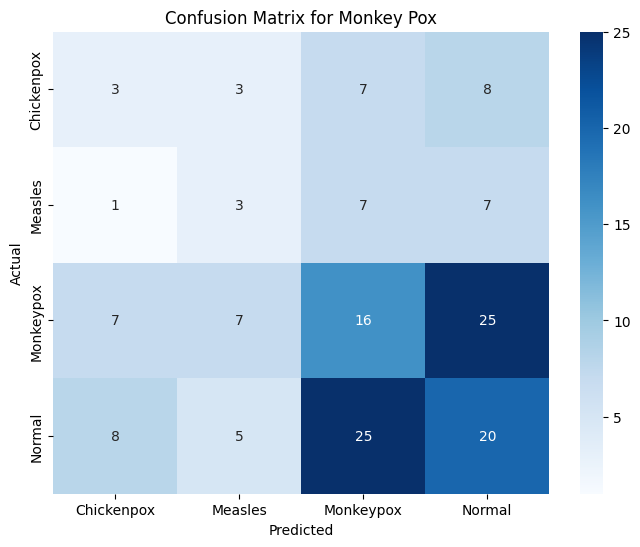

In [12]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix for Monkey Pox")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 68,782,214 (262.38 MB)

 Trainable params: 22,909,228 (87.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 45,818,458 (174.78 MB)

In [14]:
model.save(f"{name}_monkey_pox.h5")